In [23]:
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, text

engine = create_engine("sqlite:///user_behavior.db")

In [24]:
query = """
SELECT 
    FLOOR(age/10)*10 as age_group,
    COUNT(*) as user_count,
    AVG(ub.app_usage_time) as avg_app_usage
FROM users u
JOIN user_behaviors ub ON u.user_id = ub.user_id
GROUP BY FLOOR(age/10)*10
ORDER BY age_group;
"""

df = pd.read_sql(query, engine)
print(df)

   age_group  user_count  avg_app_usage
0         10          23     256.086957
1         20         180     271.338889
2         30         164     270.957317
3         40         159     271.522013
4         50         174     272.701149


In [22]:
query = """
WITH RankedDevices AS (
    SELECT 
        os.operating_system,
        d.device_model,
        AVG(ub.battery_drain) as avg_battery_drain,
        ROW_NUMBER() OVER (
            PARTITION BY os.operating_system 
            ORDER BY AVG(ub.battery_drain) DESC
        ) as device_rank
    FROM user_behaviors ub
    JOIN devices d ON ub.device_id = d.device_id
    JOIN os ON ub.os_id = os.os_id
    GROUP BY os.operating_system, d.device_model
)
SELECT *
FROM RankedDevices
ORDER BY operating_system, avg_battery_drain DESC;
"""

df = pd.read_sql(query, engine)
print(df)

  operating_system        device_model  avg_battery_drain  device_rank
0          Android        Xiaomi Mi 11        1528.876712            1
1          Android           OnePlus 9        1523.849624            2
2          Android  Samsung Galaxy S21        1504.571429            3
3          Android      Google Pixel 5        1475.676056            4
4              iOS           iPhone 12        1589.513699            1


In [ ]:
# 產生報告
profile = ProfileReport(df, minimal=True)
profile.to_notebook_iframe()

In [ ]:
# Distribution of User Behavior Class
plt.figure(figsize=(10, 6))
sns.countplot(x='User Behavior Class', data=df)
plt.title('Distribution of User Behavior Class')
plt.show()

In [ ]:
# Correlation heatmap of numeric features
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [ ]:
from sqlalchemy import create_engine, text
engine = create_engine("sqlite:///user_behavior.db")

In [ ]:
query = "SELECT * FROM devices"
df = pd.read_sql(query, engine)
df.head()

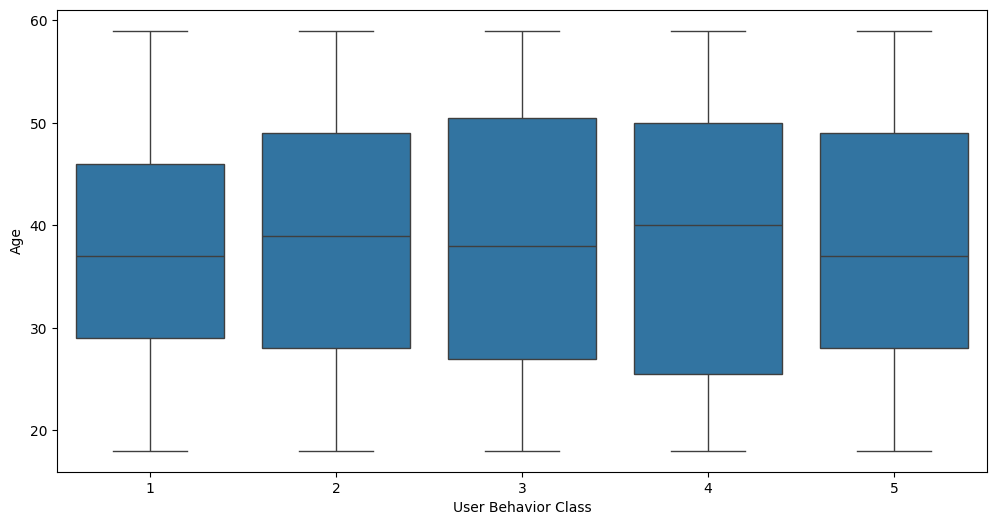

In [2]:
# 讀取資料
df = pd.read_csv("./data/user_behavior_dataset.csv")

# 1. 不同行為類別的年齡分布
plt.figure(figsize=(12, 6))
sns.boxplot(x='User Behavior Class', y='Age', data=df)
plt.show()

<Figure size 1000x600 with 0 Axes>

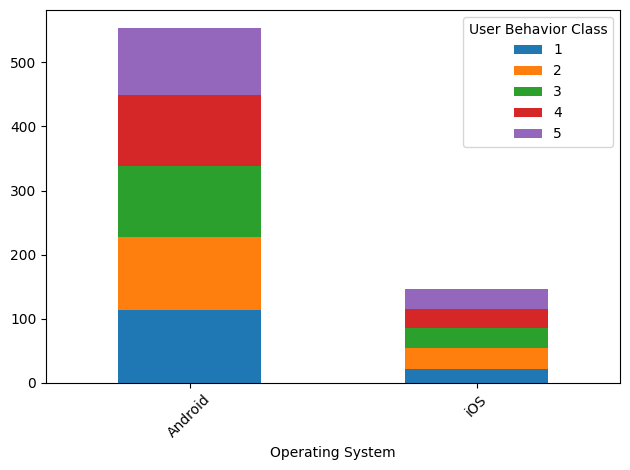

In [3]:
# 2. 各作業系統的使用者行為類別分布
plt.figure(figsize=(10, 6))
behavior_os = pd.crosstab(df['Operating System'], df['User Behavior Class'])
behavior_os.plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

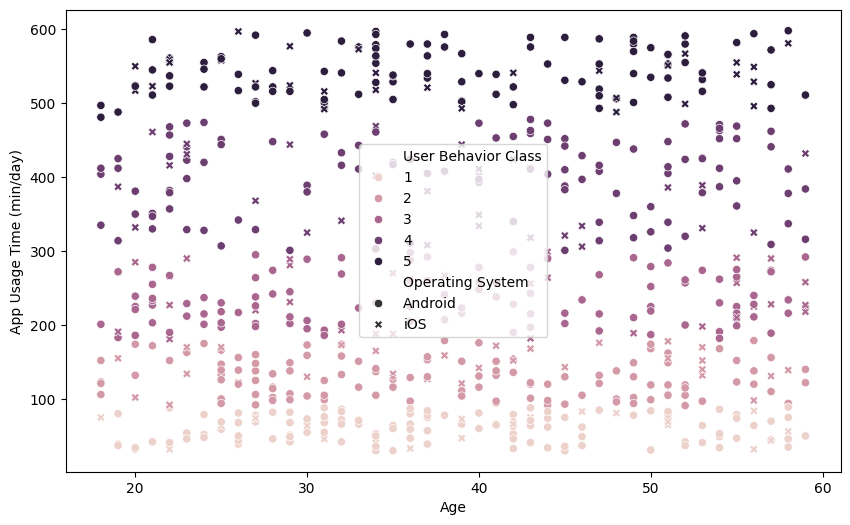

In [13]:

# 3. 應用程式使用時間與螢幕開啟時間的關係
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Age', 
    y='App Usage Time (min/day)',
    hue='User Behavior Class',
    style='Operating System'
)
plt.show()

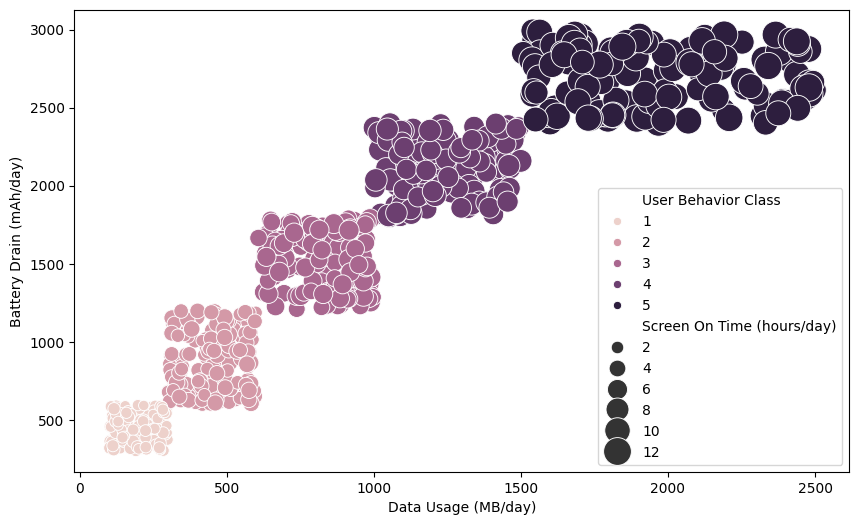

In [5]:
# 4. 電池消耗與數據使用量的關係
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Data Usage (MB/day)',
    y='Battery Drain (mAh/day)',
    hue='User Behavior Class',
    size='Screen On Time (hours/day)',
    sizes=(50, 400)
)
plt.show()

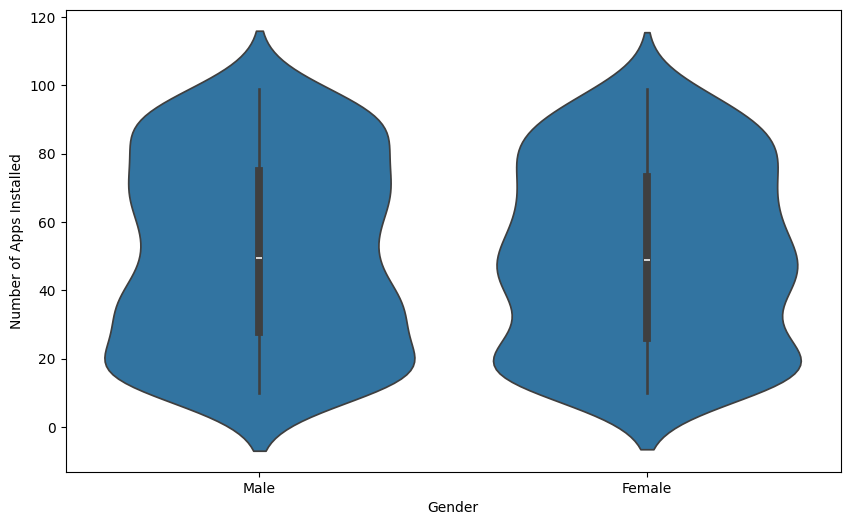

In [6]:
# 5. 不同性別的應用程式安裝數量分布
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Number of Apps Installed', data=df)
plt.show()

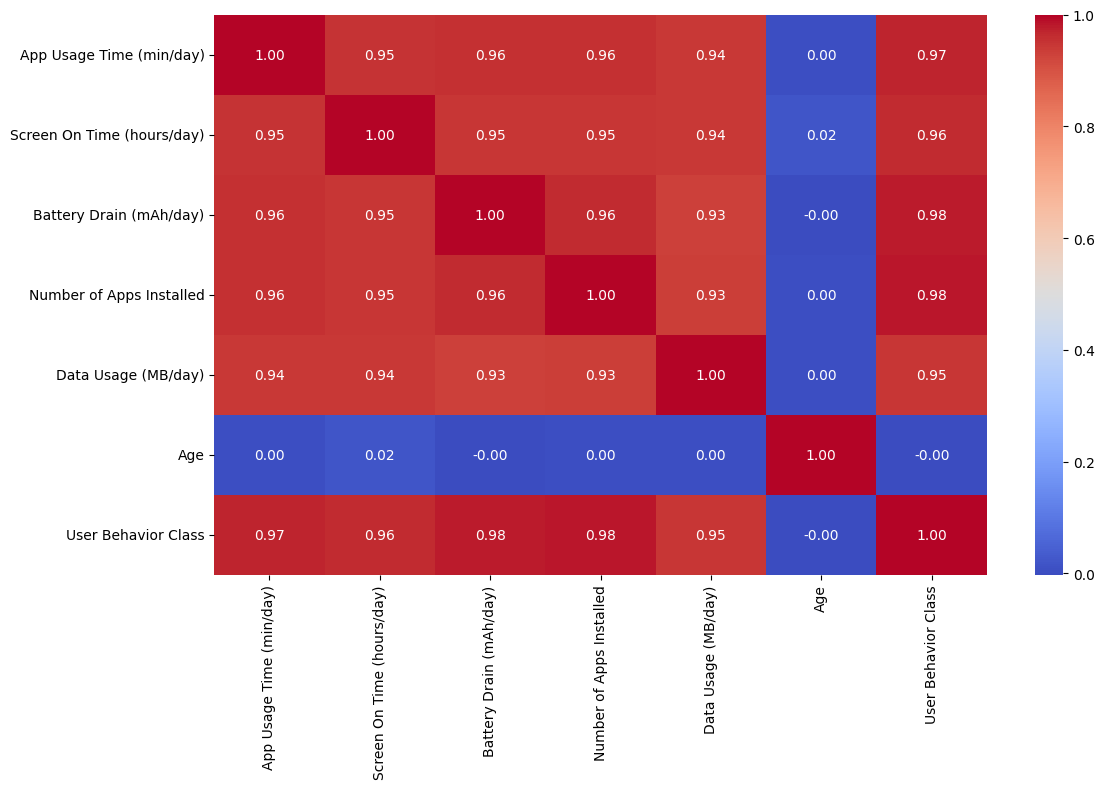

In [8]:
# 6. 各項指標的相關性熱圖
numeric_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                  'Battery Drain (mAh/day)', 'Number of Apps Installed', 
                  'Data Usage (MB/day)', 'Age', 'User Behavior Class']
correlation = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.tight_layout()
plt.show()